# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [927]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID","Mouse ID"])
merged_data.head()

# Display the data table for preview
organized_merged_data=merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)" , "Metastatic Sites","Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
organized_merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [928]:
# Checking the number of mice.
distinct_mouse=organized_merged_data['Mouse ID'].unique()
unique_mice = len(distinct_mouse)
unique_mice

249

In [929]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = organized_merged_data.loc[organized_merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [930]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = organized_merged_data.loc[organized_merged_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [931]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = organized_merged_data[organized_merged_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [932]:
# Checking the number of mice in the clean DataFrame.

clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [933]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_variance = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()



summary_stats_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})


summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [934]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

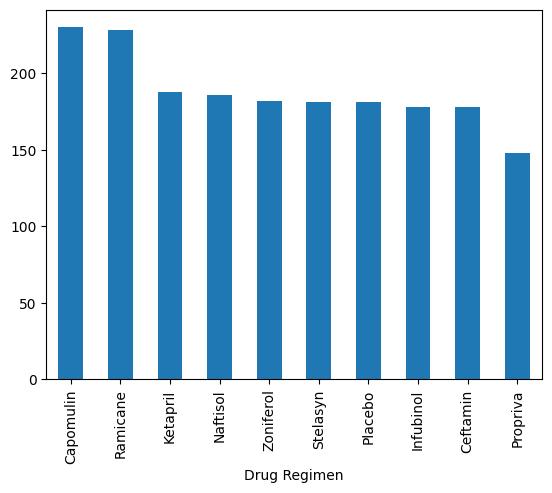

In [935]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue')  
plt.xlabel=("Drug Regimen")
plt.ylabel=("# of mice")
plt.title=("# of mice per Regimen")
#mice_count.plot.bar(title='# of mice per Regimen',y='# of mice',figsize=(10,5))
plt.show

TypeError: 'str' object is not callable

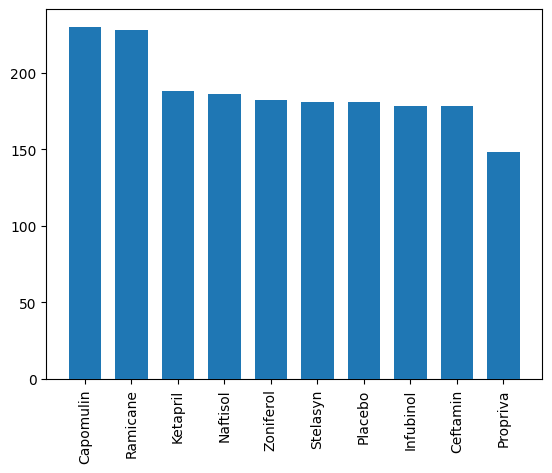

In [936]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
# Calculate the amount of data points for each drug regimen
# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(mice_count))

plt.bar(x_axis, mice_count, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment Regimen")

# Display resulting plot
plt.show()

TypeError: 'str' object is not callable

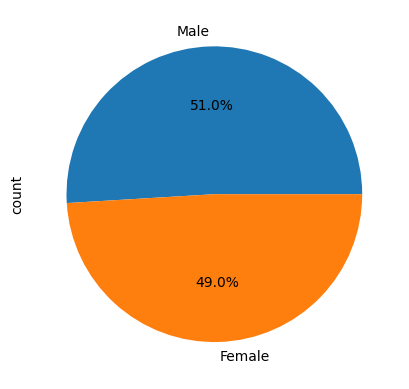

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

TypeError: 'str' object is not callable

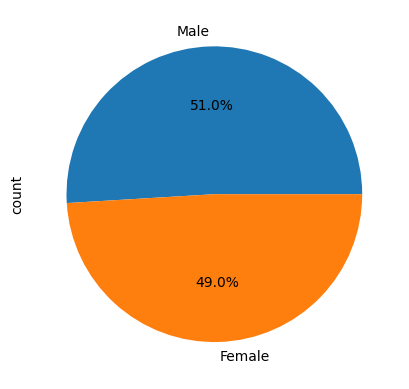

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
sizes = [958,922]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []



# Start by getting the last (greatest) timepoint for each mouse
by_mouse = merged_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

TypeError: 'str' object is not callable

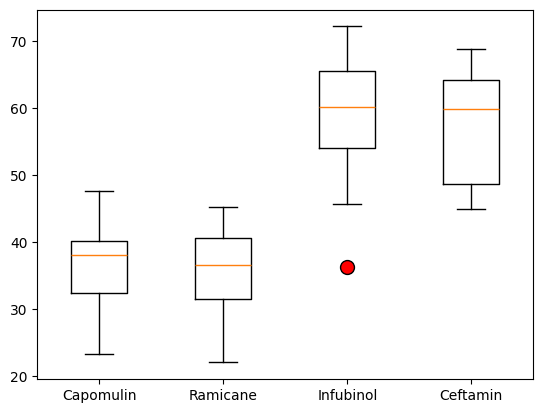

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_set = clean_df[clean_df['Drug Regimen']== 'Capomulin']
special_mouse = capo_set.loc[capo_set['Mouse ID'] == 'b742']
timepoints = [0,5,10,15,20,25,30,35,40,45]
plt.title('Tumor Volume (mm3) vs Timepoint with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0,45)
plt.ylim(special_mouse['Tumor Volume (mm3)'].min(),special_mouse['Tumor Volume (mm3)'].max())

plt.plot(special_mouse['Timepoint'],special_mouse['Tumor Volume (mm3)'])
plt.show()


TypeError: 'str' object is not callable

TypeError: 'str' object is not callable

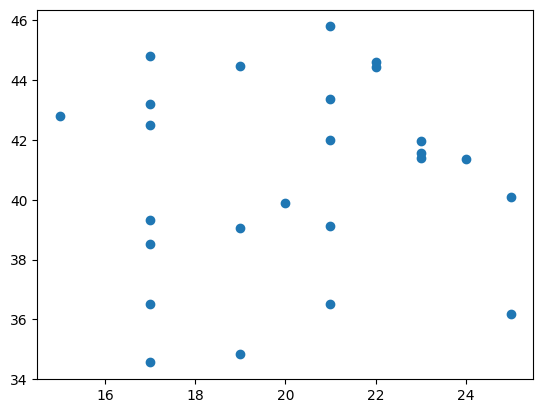

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_grouped = capo_set.groupby(['Mouse ID','Sex'])['Weight (g)']
capo_ave = capo_set.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean().rename('Ave Volume')
capo_weight = capo_set.groupby(['Mouse ID'])['Weight (g)'].value_counts()

cap_df = capo_set.drop_duplicates(subset=['Mouse ID','Weight (g)'], keep='last')
weight_cap = cap_df['Weight (g)']
plt.scatter(weight_cap.values,capo_ave.values)
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.values.min()-1,capo_ave.values.max()+1)
plt.xlim(weight_cap.values.min()-1,weight_cap.values.max()+1)

plt.show()

## Correlation and Regression

TypeError: 'str' object is not callable

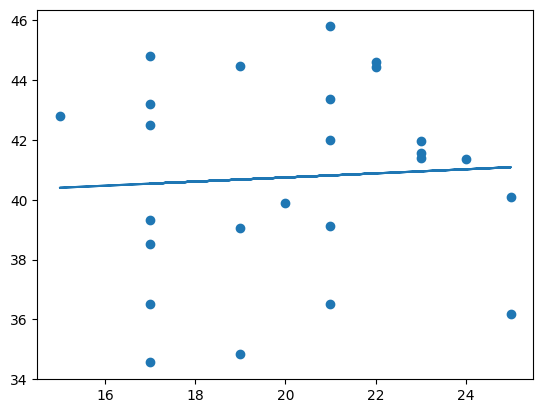

In [937]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(weight_cap.values, capo_ave.values)
ca_fit = ca_slope * weight_cap.values + ca_int
plt.scatter(weight_cap.values,capo_ave.values)
plt.plot(weight_cap.values,ca_fit,'-')
plt.title('Average tumor volumes vs mouse weight for Capomulin')
plt.ylabel('Average tumor volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(capo_ave.values.min()-1,capo_ave.values.max()+1)
plt.xlim(weight_cap.values.min()-1,weight_cap.values.max()+1)
plt.show()